<h1 style="color: #34495E; font-family: 'Trebuchet MS', sans-serif; text-align: center;"> 🛒 E-commerce Sales Analysis </h1>


<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif; text-align: center;"> A comprehensive study based on online sales data 📊</h2>


<h1 style="color: #34495E; font-family: 'Trebuchet MS', sans-serif;">00 | Initial Setup ⚙️</h1>


<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">0.1 | Import Libraries 📚</h2>


In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">0.2 | Display Settings & Warnings Handling ⚙️</h2>


In [2]:
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

 <h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">0.3 | Auxiliary Function Definitions 🔧</h2>


In [3]:
# 🔧 Basic functions

# Standarize and returns Snake columns
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns=[col.lower().replace(" ","_") for col in data.columns]

# Change to datetime
def change_to_datetime(data, column_name):
    """
    Changing the specified column to datetime format.
    """
    data[column_name] = pd.to_datetime(data[column_name])
    return data

 
# Reordering Columns
def move_column(data, column_name, new_position):
    """
    Function to reorder columns in a DataFrame by position.
    data; column_name: Column to move, new_position: new index.
    """
    col_to_move = df.pop(column_name)  
    df.insert(new_position, column_name, col_to_move)   
    return data

# Tukey's test for outliers
def tukey_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q2 = data.quantile(0.50) 
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    result = { 'Q1': Q1, 'Q2 (Median)': Q2,'Q3': Q3,'IQR': IQR,'Lower Bound': lower_bound,'Upper Bound': upper_bound}
    return result
 

 <h1 style="color: #34495E; font-family: 'Trebuchet MS', sans-serif;">01 | Data Loading 📥</h1>


In [505]:
data = pd.read_csv("1df_new_apr.csv")
df3 = pd.read_csv("3user_new.csv")

In [506]:
# Appy fuction  snake_columns

snake_columns(data)
snake_columns(df3)

In [6]:
data.sample(1)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation
534149,3ElB3KVTxh6,EK_PD67MTDG,50,2022-04-12,Business Cards,Business Cards,Business Cards - Shapes,NA Business Cards - Business Cards - Standard,US,11.18,83.76,20003,US-Priority,VISA,10.20,69.64,Nevada,NV


In [7]:
# Create new column Price.

def calculate_price(data):
    return (data["total_bookings"] + data["discount"]) / data["quantity"] if data["quantity"] != 0 else 0

data["price"] = data.apply(calculate_price, axis=1)

In [8]:
# Merge df3 "users"  & data "products"

df_merge = pd.merge(df3, data, on="customer_id", how="inner")


In [9]:
df = data.copy()

In [10]:
df_users = df3.copy()

In [508]:
df3["total_variable_gross_profit_3yr"].describe()

count    292234.00
mean       1326.35
std        3665.01
min     -245548.27
25%         140.36
50%         459.00
75%        1329.37
max      527836.03
Name: total_variable_gross_profit_3yr, dtype: float64

In [509]:
df_scaled["total_variable_gross_profit_3yr"].describe()

count   522940.00
mean         0.00
std          1.00
min        -89.68
25%         -0.24
50%         -0.24
75%         -0.09
max        192.00
Name: total_variable_gross_profit_3yr, dtype: float64

<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">1.2 | Data Exploration 🔍</h2>


<h3 style="color: #9b59b6; font-family: 'Arial', sans-serif;"> Categorial Data || Numerical Data </h3>

In [34]:
cat_all = df.copy()
cat_all = df.select_dtypes("object")
num_all = df.copy()
num_all = df.select_dtypes("number")

<h3 style="color: #9b59b6; font-family: 'Arial', sans-serif;"> Histogram </h3>

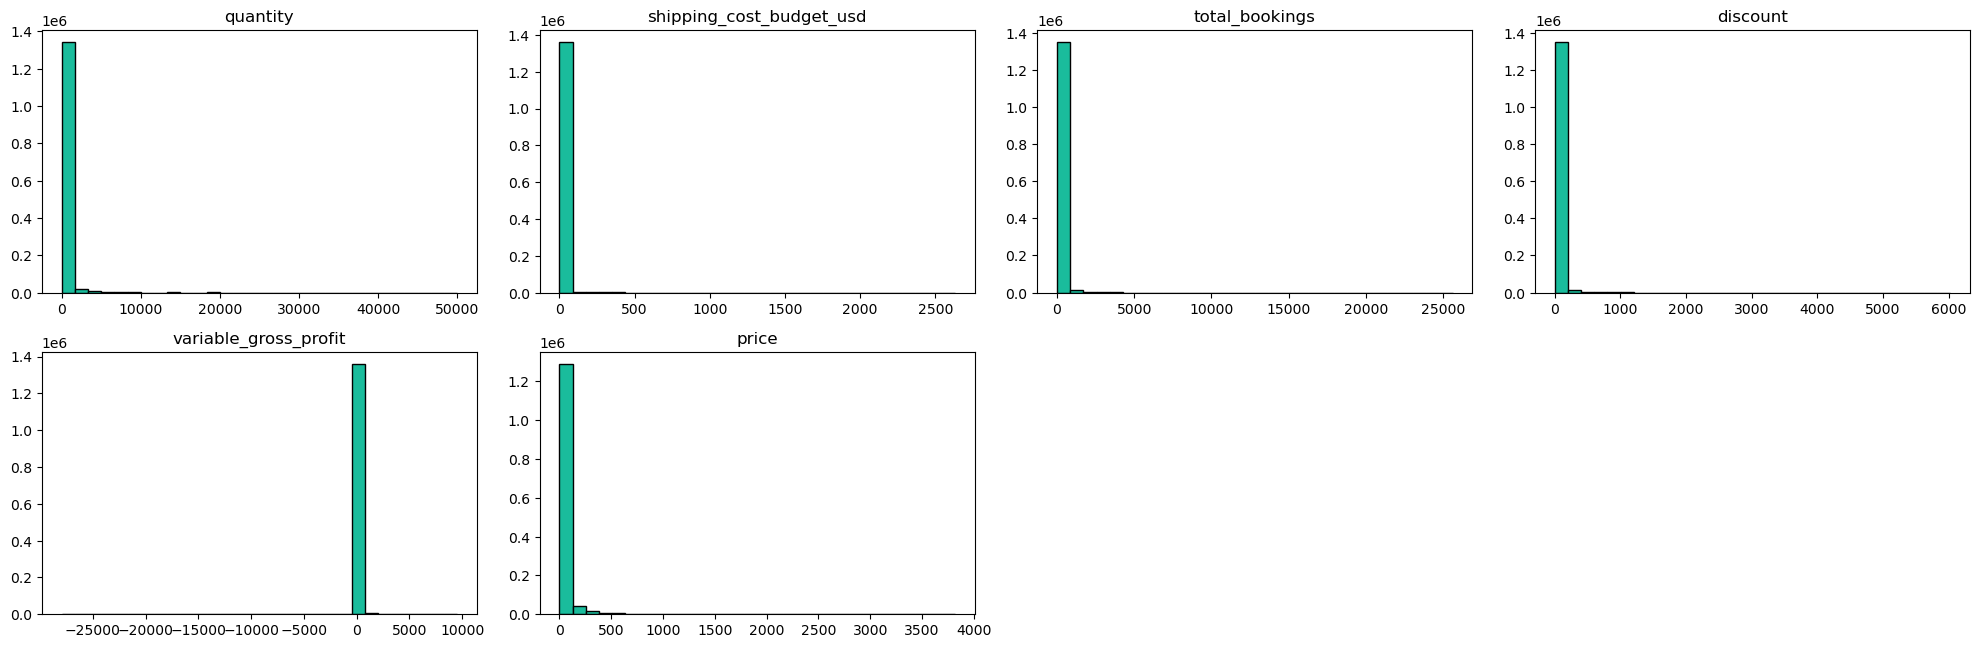

In [37]:
# histogram for all columns  num_all
color = '#1abc9c'
# grid size
nrows, ncols = 5, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()
# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num_all.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num_all.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num_all.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #9b59b6; font-family: 'Arial', sans-serif;"> Boxplots </h3>

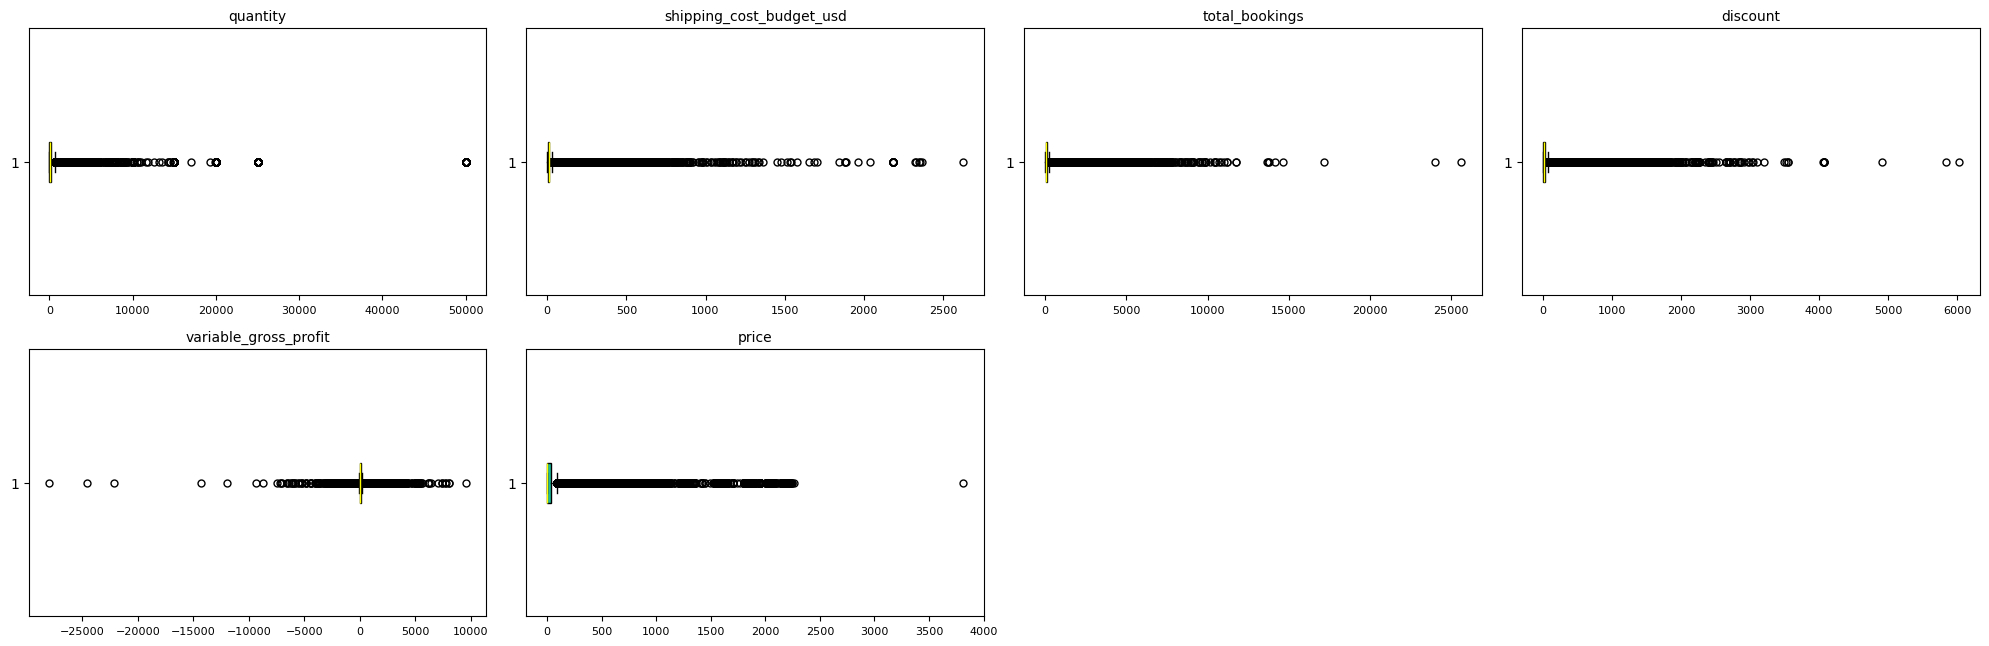

In [40]:
# color for boxplots
box_color = '#1abc9c'

# Grid size
nrows, ncols = 5, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(num_all.columns[:len(axes)]):  # Limit iteration to available axes
    ax = axes[i]
    ax.boxplot(num_all[col].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=box_color, color='black'),
               medianprops=dict(color='yellow'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    
# Hide unused axes
for ax in axes[len(num_all.columns):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

<h3 style="color: #9b59b6; font-family: 'Arial', sans-serif;">Heatmap</h3>


In [210]:
# correlation matrix with Pearson (linearity) to help analyse through visualization
correlation_matrix_all = round(num_all.corr(), 2)

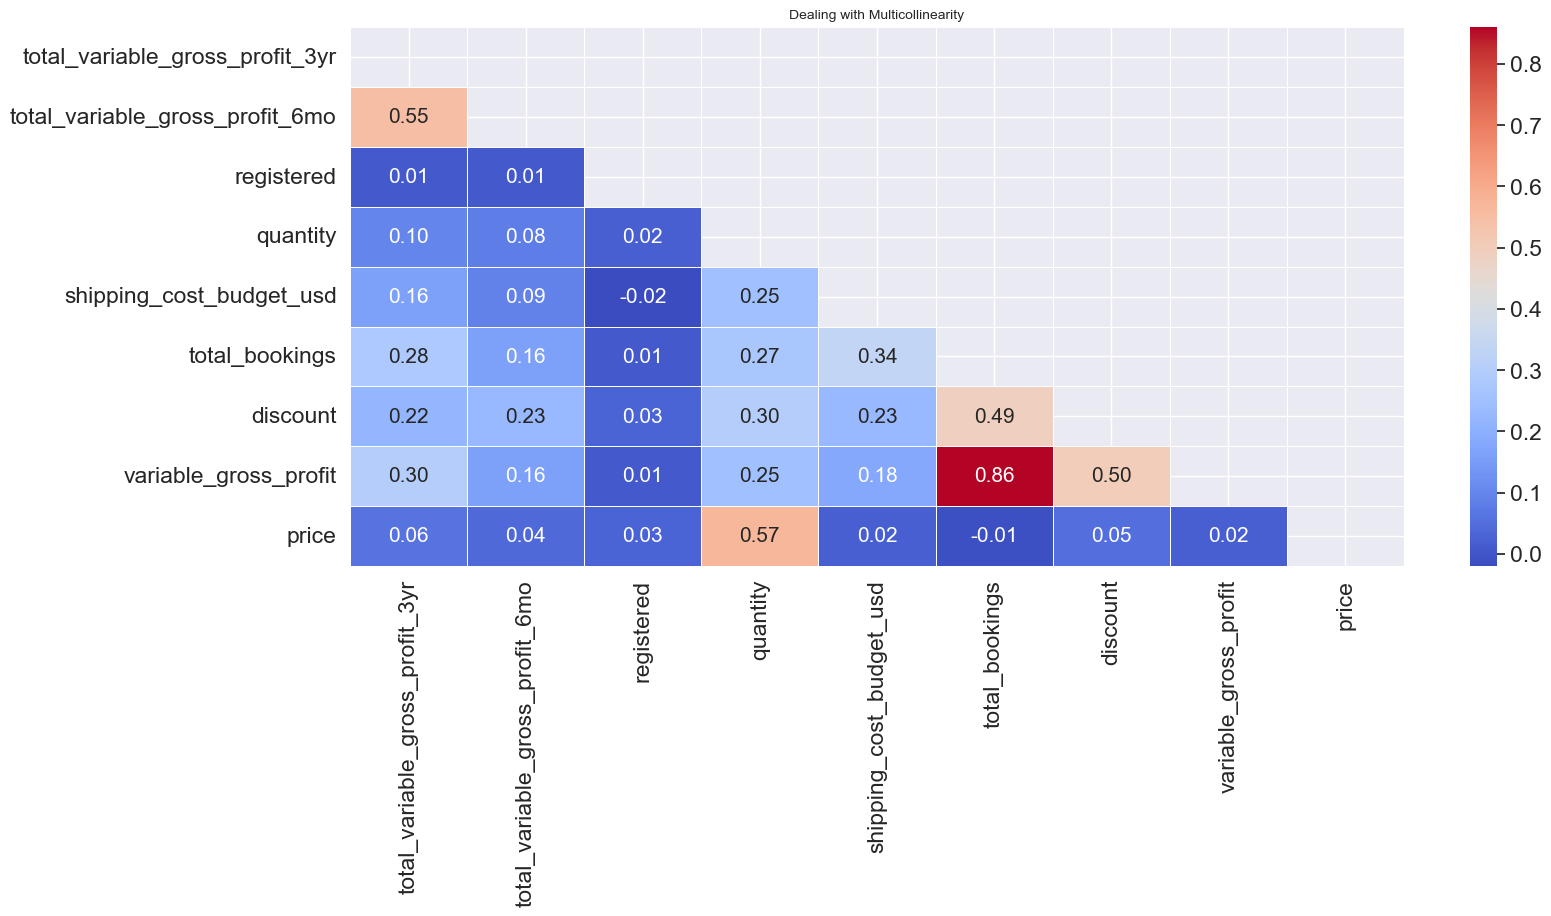

In [212]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(correlation_matrix_all)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17, 7))
sns.set(font_scale=1.5)
ax = sns.heatmap(correlation_matrix_all, mask=mask, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=10)
plt.show()

<h3 style="color: #7F8C8D; font-family: 'Trebuchet MS', sans-serif;">1.2.1 | Preview of the Dataset</h3>


<h3 style="color: #7F8C8D; font-family: 'Trebuchet MS', sans-serif;">1.2.2 | Data Type Information</h3>


<h1 style="color: #34495E; font-family: 'Trebuchet MS', sans-serif;">02 | Data Cleaning 🧹</h1>


<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">2.1 | Handling Missing Values 🚫</h2>


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_id                         8057 non-null   object 
 1   registration_date                   7639 non-null   object 
 2   total_variable_gross_profit_3yr     4044 non-null   float64
 3   total_variable_gross_profit_6mo     4044 non-null   float64
 4   lifecycle_segment_name              8057 non-null   object 
 5   registered                          8057 non-null   int64  
 6   order_number                        8057 non-null   object 
 7   quantity                            8057 non-null   int64  
 8   order_created_date                  8057 non-null   object 
 9   category                            8057 non-null   object 
 10  subcategory                         8057 non-null   object 
 11  product_group                       8057 no

In [249]:
df.isnull().sum()

customer_id                              0
registration_date                      418
total_variable_gross_profit_3yr       4013
total_variable_gross_profit_6mo       4013
lifecycle_segment_name                   0
registered                               0
order_number                             0
quantity                                 0
order_created_date                       0
category                                 0
subcategory                              0
product_group                            0
product_name                             0
country                                  0
shipping_cost_budget_usd                 0
total_bookings                           0
order_shipping_address_postal_code     291
shipping_speed                         291
payment_method_name                      0
discount                                 0
variable_gross_profit                    0
state                                    0
state_abbreviation                       0
price      

<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">2.2 | Correcting Data Types 🔢</h2>


In [277]:
df.dtypes

customer_id                                   object
registration_date                     datetime64[ns]
total_variable_gross_profit_3yr              float64
total_variable_gross_profit_6mo              float64
lifecycle_segment_name                        object
registered                                     int64
order_number                                  object
quantity                                       int64
order_created_date                    datetime64[ns]
category                                      object
subcategory                                   object
product_group                                 object
product_name                                  object
country                                       object
shipping_cost_budget_usd                     float64
total_bookings                               float64
order_shipping_address_postal_code            object
shipping_speed                                object
payment_method_name                           

In [47]:
df = change_to_datetime(df, "registration_date")   
df = change_to_datetime(df, "order_created_date")   

<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">2.3 | Duplicates 🗑️</h2>


In [51]:
df.duplicated().sum()

831

<h1 style="color: #34495E; font-family: 'Trebuchet MS', sans-serif;">03 | Exploratory Data Analysis (EDA) 🔍</h1>


<h2 style="color: #1ABC9C; font-family: 'Trebuchet MS', sans-serif;">3.1 | Price  Analysis 📈</h2>


<h4 style="color: #E67E22; font-family: 'Trebuchet MS', sans-serif;">3.1.1.5 | Price Distribution Histogram </h4>


In [35]:
df["price"].min() # 0 
df["price"].max() # 1865.206

3243.6

In [37]:
tukey_test_outliers(df["price"])

{'Q1': 0.348908,
 'Q2 (Median)': 1.3253199999999998,
 'Q3': 32.028,
 'IQR': 31.679091999999997,
 'Lower Bound': -47.169729999999994,
 'Upper Bound': 79.546638}

In [39]:
# Histogram without atypical values based on IQR 31.82282133333333
# lower_bound -47.39871999999999
# upper_bound 79.89256533333332


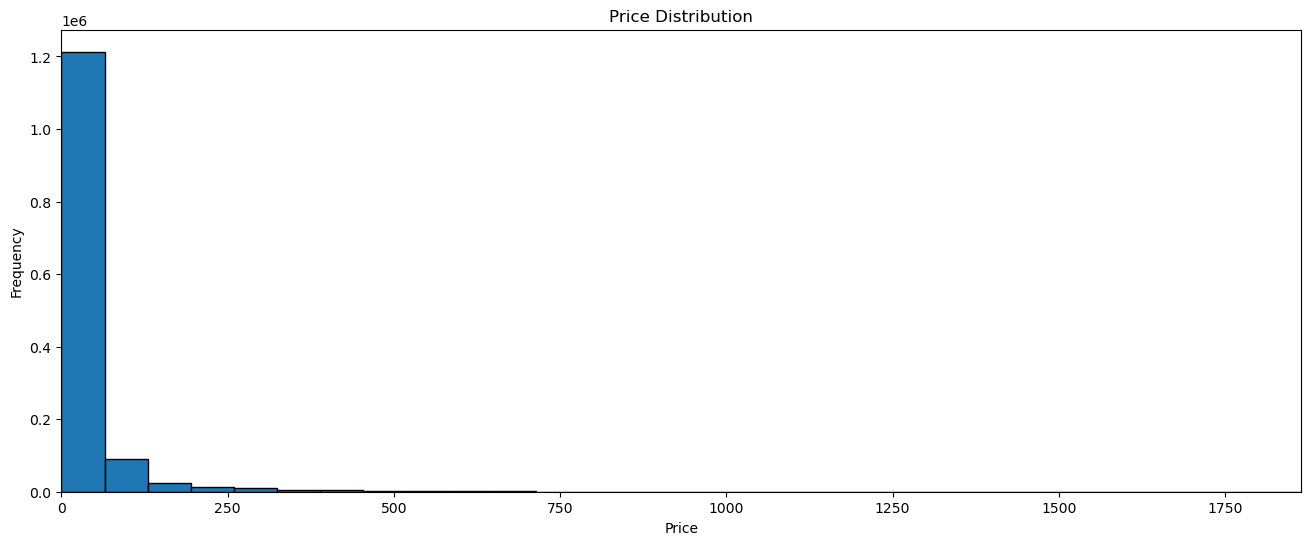

In [42]:
plt.figure(figsize=(16, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.xlim(0, 1865)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

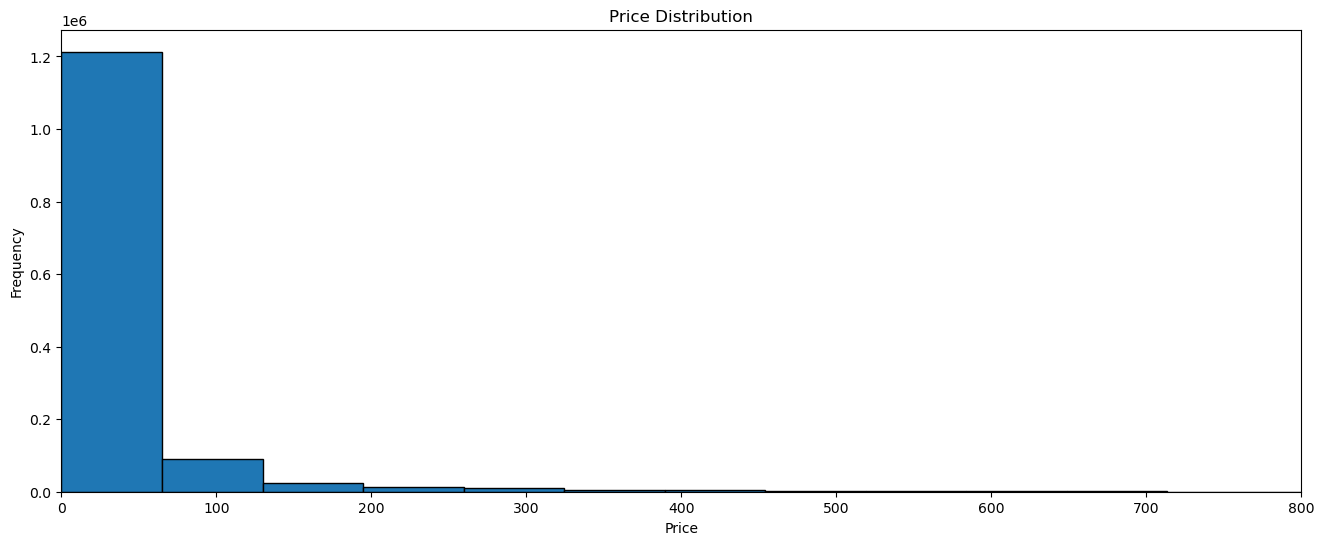

In [44]:
plt.figure(figsize=(16, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.xlim(0, 800)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<h4 style="color: #E67E22; font-family: 'Trebuchet MS', sans-serif;">3.1.1.1 | Boxplot all Outliers</h4>


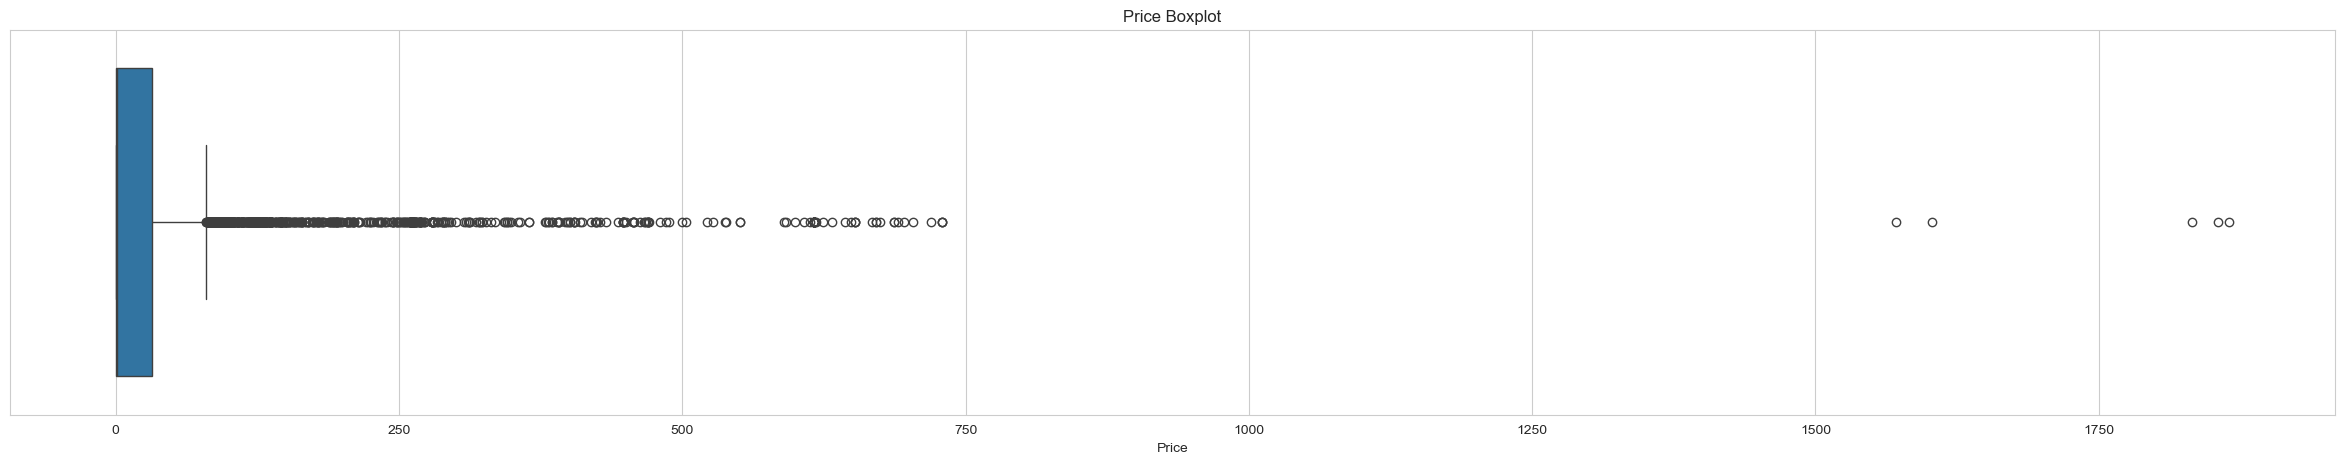

In [201]:
# Normal Boxplot "price"

plt.figure(figsize=(30, 5))   
sns.set_style("whitegrid")  
sns.boxplot(x=df['price'])  
plt.title('Price Boxplot')  
plt.xlabel('Price')  
plt.show()

<h4 style="color: #E67E22; font-family: 'Trebuchet MS', sans-serif;">3.1.1.2 | Price Boxplot || Limir 800 ||   </h4>


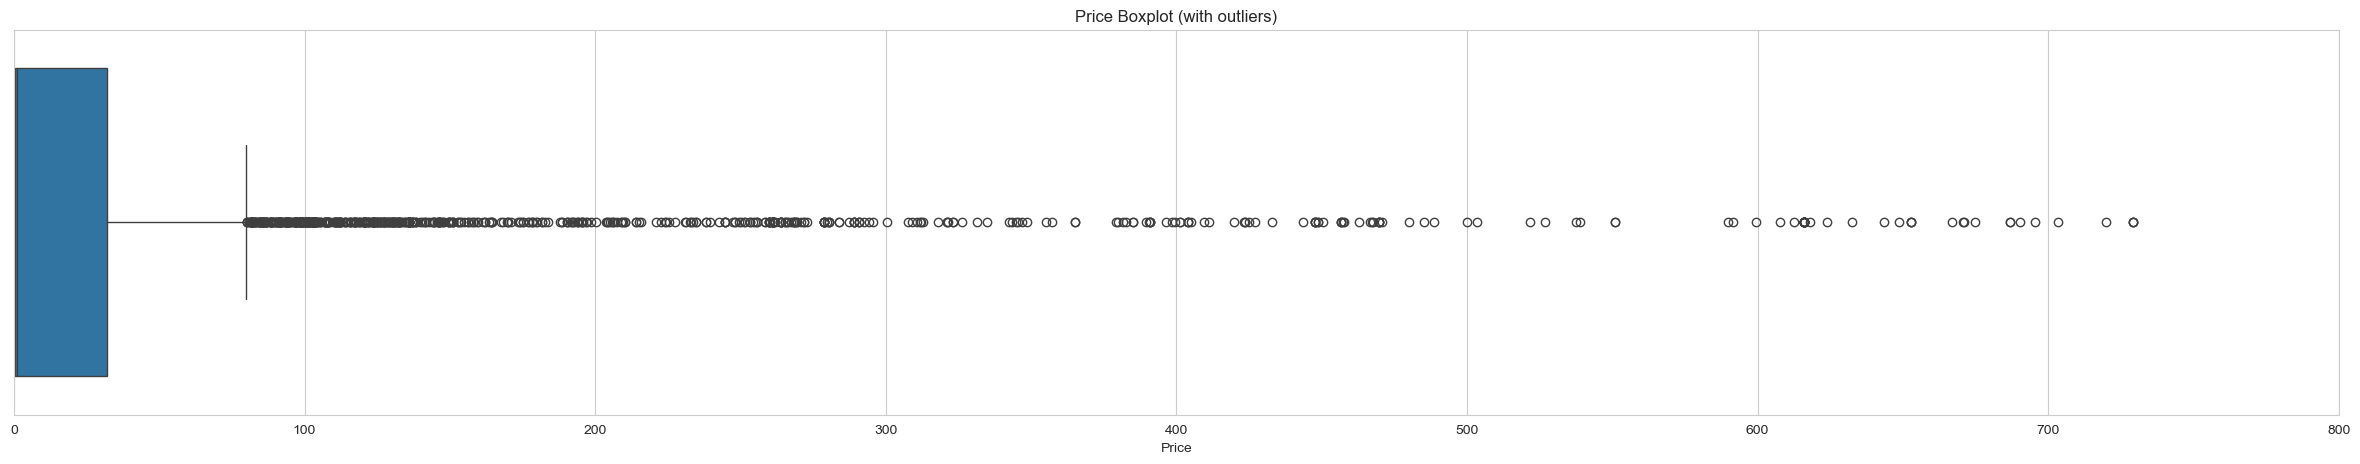

In [203]:
plt.figure(figsize=(30, 5))
sns.boxplot(x=df["price"])
plt.xlim(0, 800)  # Limit range for better visualization
plt.title("Price Boxplot (with outliers)")
plt.xlabel("Price")
plt.show()


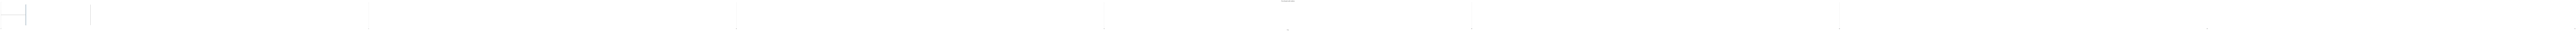

<h4 style="color: #E67E22; font-family: 'Trebuchet MS', sans-serif;">3.1.1.3 | Price Distribution (Original) </h4>


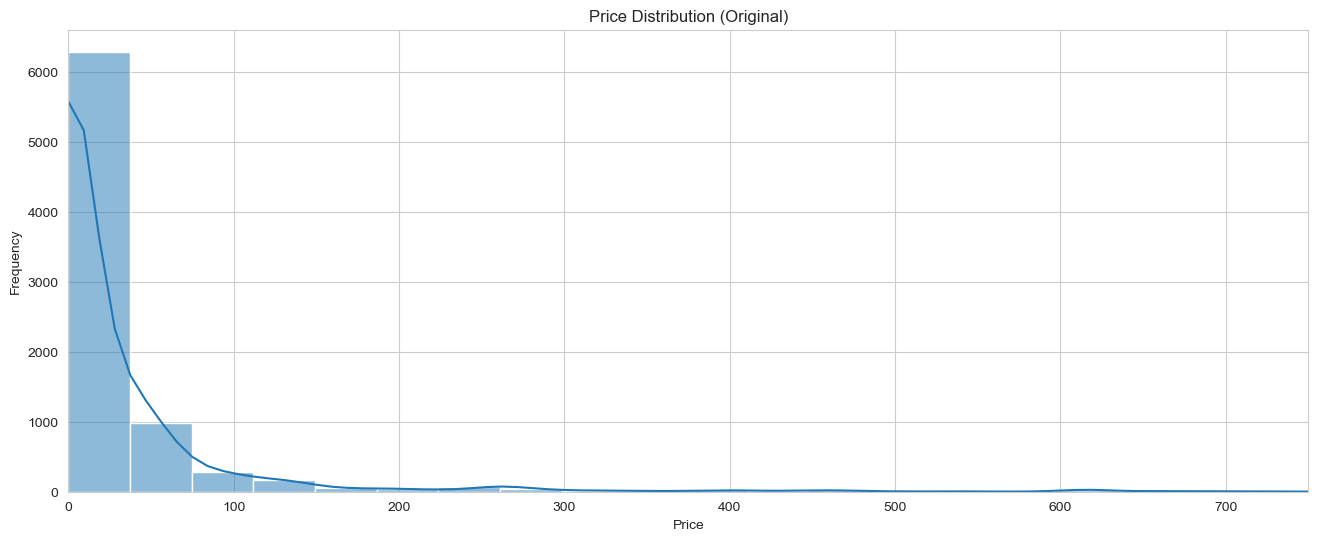

In [216]:
# Histogram of original price
plt.figure(figsize=(16, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.xlim(0, 750)  
plt.title("Price Distribution (Original)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


<h4 style="color: #E67E22; font-family: 'Trebuchet MS', sans-serif;">3.1.1.4 | Price Distribution (Logarithmic Transformation) </h4>


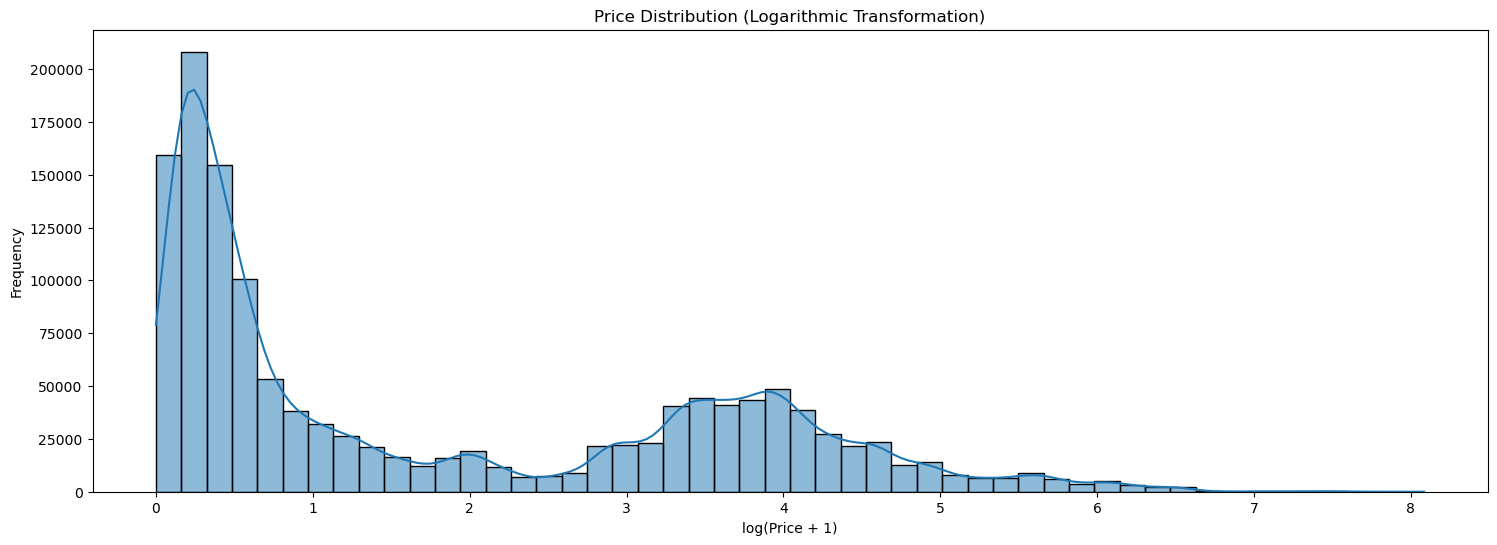

In [42]:
# Histogram with Logarithmic transformation
plt.figure(figsize=(18, 6))
sns.histplot(np.log1p(df["price"]), bins=50, kde=True)
plt.title("Price Distribution (Logarithmic Transformation)")
plt.xlabel("log(Price + 1)")
plt.ylabel("Frequency")
plt.show()


<h2 style="color: #20C997  ; font-family: 'Trebuchet MS', sans-serif;">3.1 | Price  Analysis 📈</h2>


In [11]:
df = data.copy()

In [12]:
df = df.dropna()

In [13]:
df.shape

(1317690, 19)

In [14]:
df_users = df3.copy()

In [15]:
df_users.shape

(603600, 6)

<h2 style="color: #20C997  ; font-family: 'Trebuchet MS', sans-serif;">3.1 | Price  Analysis 📈</h2>


<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.2 | Exploring and Grouping Items: Mean Prices and Count per Product</h3>

In [16]:
# Filtered data with out 0 in column Price.

df_avg_price_per_item = df[df["price"] > 0]

<h4 style="color: #E75480  ; font-family: 'Trebuchet MS', sans-serif;"> 3.1.2.1 | Calculate the mean price of individual products. </h4>


In [17]:
#   new column, mean_price, for the different individual products. 

df_avg_price_per_item = df.groupby(["category", "subcategory", "product_group", "product_name"])["price"].mean().reset_index()

In [18]:
# Rename colum, mean_price

df_avg_price_per_item.rename(columns={"price": "mean_price"}, inplace=True)

In [19]:
################################################### TEST

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.2.2 | Count the total number of products per item group. </h4>


In [23]:
# Create a new column to count the total number of products per item.

df_item_count = df_avg_price_per_item.groupby("product_group")["product_name"].nunique().reset_index(name="product_count")

<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> 3.1.1.4 | Merge data with "mean_price" and "product_count". </h4>


In [24]:
## Merge mean_price and product_count

df_items_mean_count = df_avg_price_per_item.merge(df_item_count, how="inner", on="product_group")

In [26]:
df_items_mean_count.sample(2)

,category,subcategory,product_group,product_name,mean_price,product_count
459,Promotique Clothing & Bags,Bags,Business,Barracuda Business Briefcase,26.76,13
1437,Promotique Clothing & Bags,Clothing,Sweaters,Hanes® Ultimate Cotton Hooded Sweatshirt,111.42,194


<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> 3.1.2.3 | Merge Mean Price in df</h4>


In [28]:
# merge  mean_price in df
 
df = df.merge(df_items_mean_count[["category", "subcategory", "product_group", "product_name", "mean_price"]], on=["category", "subcategory", "product_group", "product_name"],   how="left")

In [29]:
df.shape

(1317690, 20)

In [30]:
df.sample(1)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price
1156210,-1246urpXp3a,EK_0EK5UKMJ,1,2022-04-26,Signage,Rigid & Office Signs,Lawn Signs,Yard Signs - NA,US,1.17,36.78,76527-4412,US-Standard,MASTERCARD,13.04,-5.79,Unknown,Unknown,49.82,63.36


<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.3 | Identifying Premium Products by Analyzing Outliers with IQR </h3>


In [32]:
df_iqr = df_items_mean_count.copy()

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.1 | Function (analyze_outliers_iqr)  </h4>


In [35]:
#columns // category	// subcategory	//  product_group  //  product_name

# function detects outliers using the IQR method. 
# if product_count is 5 or more, 
# it uses "product_group"; otherwise, it groups 
# by "subcategory" for better accuracy.

def analyze_outliers_iqr(data, value_column):
    results = []
    
    ## Determine the grouping column for each row ||product_count || subcategory ||
    data["grouping_column"] = data.apply(lambda row: "product_group" if row["product_count"] >= 5 else "subcategory", axis=1)
    
    # Group by the selected column.
    for group, group_data in data.groupby(data["grouping_column"]):
        group_data = group_data.copy()
        
        ## Calculate IQR
        Q1 = group_data[value_column].quantile(0.25)
        Q2 = group_data[value_column].quantile(0.50)
        Q3 = group_data[value_column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Add new columns
        group_data["Q1"] = Q1
        group_data["Q2_Median"] = Q2
        group_data["Q3"] = Q3
        group_data["IQR"] = IQR
        group_data["lower_bound"] = lower_bound
        group_data["upper_bound"] = upper_bound
        group_data["max_price"] = group_data[value_column].max()
        group_data["min_price"] = group_data[value_column].min()
        
        results.append(group_data)
    
    return pd.concat(results)


In [36]:
# apply function

iqr_results = analyze_outliers_iqr(df_iqr, "mean_price")


In [37]:
iqr_results.sample(1)

,category,subcategory,product_group,product_name,mean_price,product_count,grouping_column,Q1,Q2_Median,Q3,IQR,lower_bound,upper_bound,max_price,min_price
2503,Promotique Hard Goods,Writing,Pens,Silver Cool Grip Stylus,1.84,195,product_group,8.08,47.71,108.98,100.89,-143.26,260.32,929.80,0.00


In [501]:
df_users["total_variable_gross_profit_3yr"].describe()

count    292234.00
mean       1326.35
std        3665.01
min     -245548.27
25%         140.36
50%         459.00
75%        1329.37
max      527836.03
Name: total_variable_gross_profit_3yr, dtype: float64

In [504]:
df3["total_variable_gross_profit_6mo"].describe()

count   292234.00
mean       217.81
std        630.15
min     -30255.70
25%          0.00
50%         51.19
75%        212.91
max      60970.99
Name: total_variable_gross_profit_6mo, dtype: float64

In [503]:
df3["total_variable_gross_profit_3yr"].min()

-245548.267169994

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.2 | Premium Product Identification  </h4>


In [38]:
df_item_premium = iqr_results.copy()

In [39]:
# Define premium items with a stricter threshold

premium_threshold = df_item_premium["upper_bound"] * 1.1  # 10% above upper bound

In [40]:
# Mark premium items (1 = Premium, 0 = Not Premium)

df_item_premium["item_premium"] = (df_item_premium["mean_price"] > premium_threshold).astype(int)

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.3 | Merge the premium product classification with user purchases </h4>


In [49]:
# df_purchases = df.merge(df_item_premium[["product_name", "item_premium"]], on="product_name", how="left")


# Merge premium classification with purchases
df_purchases = df.merge(
    df_item_premium[["category", "subcategory", "product_group", "product_name", "item_premium"]],
    on=["category", "subcategory", "product_group", "product_name"],
    how="left"
)

In [50]:
# Fill missing values in 'item_premium' with 0 (Non-premium)
df_purchases["item_premium"].fillna(0, inplace=True)

In [54]:
df_purchases["item_premium"].value_counts()

item_premium
0    1291527
1      26163
Name: count, dtype: int64

In [55]:
test_msssse_ssssprg = df_purchases[df_purchases["customer_id"] == "22EZOsiiR8I" ]     #  discount_percentage =  max = 91.020  min = 30.95
test_msssse_ssssprg

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium
120391,22EZOsiiR8I,EK_ACJIK5N9,1,2022-04-04,Signage,Banners,Standing Banners,Retractable Banners - NA,US,16.93,458.00,19125-3045,US-Standard,MASTERCARD,32.12,312.39,West Virginia,WV,490.12,358.27,1
148233,22EZOsiiR8I,EK_ACJIK5N9,25,2022-04-04,Labels,Label & Stickers,Sticker Singles,Sticker Singles Rectangle,US,15.18,55.00,19125-3045,US-Standard,MASTERCARD,3.86,0.82,West Virginia,WV,2.35,2.41,0
436298,22EZOsiiR8I,EK_ANAW06PO,1,2022-04-11,Signage,Events & Tradeshow,Tablecloths,Tablecloths - NA,US,7.09,518.00,19125-3045,US-Standard,MASTERCARD,35.28,385.39,West Virginia,WV,553.28,621.86,1
468852,22EZOsiiR8I,EK_ANAW06PO,1,2022-04-11,Signage,Events & Tradeshow,Tablecloths Accessories,Tablecloth Clamps - NA,US,7.09,10.18,19125-3045,US-Standard,MASTERCARD,0.70,-1.47,West Virginia,WV,10.88,11.52,0


In [56]:
test_msssse_ssssprg["item_premium"].value_counts()

item_premium
1    2
0    2
Name: count, dtype: int64

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.3 |  Count premium and non-premium purchases per user </h4>


In [61]:
#  Count total purchases per user

# Count total purchases per user
df_total_purchases = df_purchases.groupby("customer_id")["product_name"].count().reset_index()
df_total_purchases.rename(columns={"product_name": "num_diff_prod_per_user_apr"}, inplace=True)
 

In [66]:
 # Count premium purchases per user
df_premium_purchases = df_purchases.groupby("customer_id")["item_premium"].sum().reset_index()
df_premium_purchases.rename(columns={"item_premium": "premium_purchase_count_apr"}, inplace=True)


In [73]:
 # Calculate total amount spent per user
df_total_spent = df_purchases.groupby("customer_id")["price"].sum().reset_index()
df_total_spent.rename(columns={"price": "total_spent_apr"}, inplace=True)


In [74]:
df_total_spent.shape

(571338, 2)

In [75]:
df_total_spent["total_spent_apr"].isnull().sum()

0

In [76]:
df_purchases[:1]

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium
0,-a7uRss6rcpW,EK_19W731SA,1,2022-04-01,Signage,Rigid & Office Signs,Lawn Signs,Yard Signs - NA,US,10.90,44.98,21671-1116,US-Standard,APPLEPAYVISA,3.54,31.16,Massachusetts,MA,48.52,63.36,0


In [77]:
df_total_spent[:2]

,customer_id,total_spent_apr
0,-100360jDkIg,16.40
1,-100FrDWBBDy,8.18


In [78]:
df_total_spent["total_spent_apr"].describe()

count   571338.00
mean        76.24
std        312.88
min          0.00
25%          0.54
50%          1.99
75%         55.36
max      87220.66
Name: total_spent_apr, dtype: float64

In [79]:
# Calculate total amount spent on premium products per user

# Calculate total amount spent on premium products per user
df_premium_spent = df_purchases[df_purchases["item_premium"] == 1].groupby("customer_id")["price"].sum().reset_index()
df_premium_spent.rename(columns={"price": "total_premium_spent_apr"}, inplace=True)

<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Merge </h4>


In [85]:
# Merge user purchase statistics
 
df_user_premium_stats = df_total_purchases.merge(df_premium_purchases, on="customer_id", how="left")

In [86]:
# Merge user purchase statistics
df_user_premium_stats = df_user_premium_stats.merge(df_total_spent, on="customer_id", how="left")


In [87]:
# Merge user purchase statistics
 
df_user_premium_stats = df_user_premium_stats.merge(df_premium_spent, on="customer_id", how="left")


In [95]:
# Fill missing values for users who never bought premium items

df_user_premium_stats["total_premium_spent_apr"].fillna(0, inplace=True)

In [97]:
df_user_premium_stats.sample(5)

,customer_id,num_diff_prod_per_user_apr,premium_purchase_count_apr,total_spent_apr,total_premium_spent_apr
416234,5xgmBOKXIu4,4,0,8.03,0.00
440035,6rQ8ABPzWvu,1,0,0.13,0.00
135524,-68x1cClVIoU,2,0,0.76,0.00
425443,6J60GLUlqJW,1,0,132.11,0.00
244599,-QoRaU7b3P2,1,0,0.56,0.00


In [98]:
df_user_premium_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
num_diff_prod_per_user_apr,571338.00,2.31,5.30,1.00,1.00,1.00,3.00,1782.00
premium_purchase_count_apr,571338.00,0.05,0.35,0.00,0.00,0.00,0.00,42.00
total_spent_apr,571338.00,76.24,312.88,0.00,0.54,1.99,55.36,87220.66
total_premium_spent_apr,571338.00,21.96,181.44,0.00,0.00,0.00,0.00,26991.98


<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.3 |   Define premium customers using different thresholds </h4>


In [101]:
df_user_premium_stats.fillna(0, inplace=True)

In [102]:
#  Calculate premium purchase percentage

df_user_premium_stats["pct_premium_purchases"] = ( df_user_premium_stats["premium_purchase_count_apr"] / df_user_premium_stats["num_diff_prod_per_user_apr"]) #.fillna(0)

In [103]:
# CCalculate premium spending percentage

df_user_premium_stats["pct_premium_spent"] = (df_user_premium_stats["total_premium_spent_apr"] / df_user_premium_stats["total_spent_apr"]) # .fillna(0)



In [104]:
df_user_premium_stats.sample(2)

,customer_id,num_diff_prod_per_user_apr,premium_purchase_count_apr,total_spent_apr,total_premium_spent_apr,pct_premium_purchases,pct_premium_spent
520708,9tzghVyN49a,3,0,1.44,0.00,0.00,0.00
228279,-9eZTVFG52og,1,0,0.19,0.00,0.00,0.00


In [106]:
df_user_premium_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
num_diff_prod_per_user_apr,571338.00,2.31,5.30,1.00,1.00,1.00,3.00,1782.00
premium_purchase_count_apr,571338.00,0.05,0.35,0.00,0.00,0.00,0.00,42.00
total_spent_apr,571338.00,76.24,312.88,0.00,0.54,1.99,55.36,87220.66
total_premium_spent_apr,571338.00,21.96,181.44,0.00,0.00,0.00,0.00,26991.98
pct_premium_purchases,571338.00,0.02,0.12,0.00,0.00,0.00,0.00,1.00
pct_premium_spent,569014.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00


<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.3 |  Apply classification logic </h4>


In [112]:
df_user_premium_stats.shape

(571338, 7)

In [113]:
 
# Define premium customers based on refined thresholds
df_user_premium_stats["customer_premium_flag"] = (
    (df_user_premium_stats["premium_purchase_count_apr"] >= 3) |  # At least 3 premium purchases
    (df_user_premium_stats["pct_premium_purchases"] >= 0.3) |  # 30% of purchases are premium
    (df_user_premium_stats["pct_premium_spent"] >= 0.5)  # 50% of total spending is premium
).astype(int)

In [114]:
df_user_premium_stats.sample(2)

,customer_id,num_diff_prod_per_user_apr,premium_purchase_count_apr,total_spent_apr,total_premium_spent_apr,pct_premium_purchases,pct_premium_spent,customer_premium_flag
313996,25BJypXVNmw,5,0,143.10,0.00,0.00,0.00,0
185710,-82tgGArIeac,2,0,89.08,0.00,0.00,0.00,0


In [115]:
# Validate results
df_user_premium_stats["customer_premium_flag"].value_counts()
 

customer_premium_flag
0    554189
1     17149
Name: count, dtype: int64

In [116]:
# Validate results
df_user_premium_stats["customer_premium_flag"].value_counts()

customer_premium_flag
0    554189
1     17149
Name: count, dtype: int64

In [117]:
df_user_premium_stats["customer_id"].duplicated().sum()

0

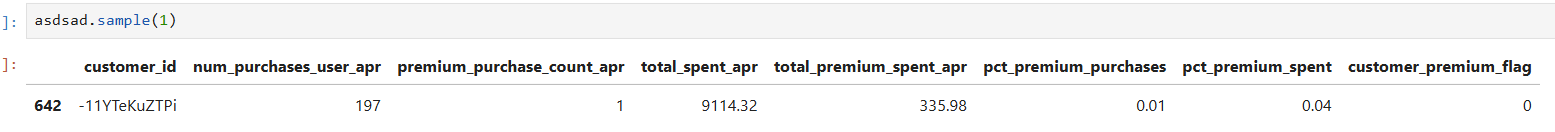

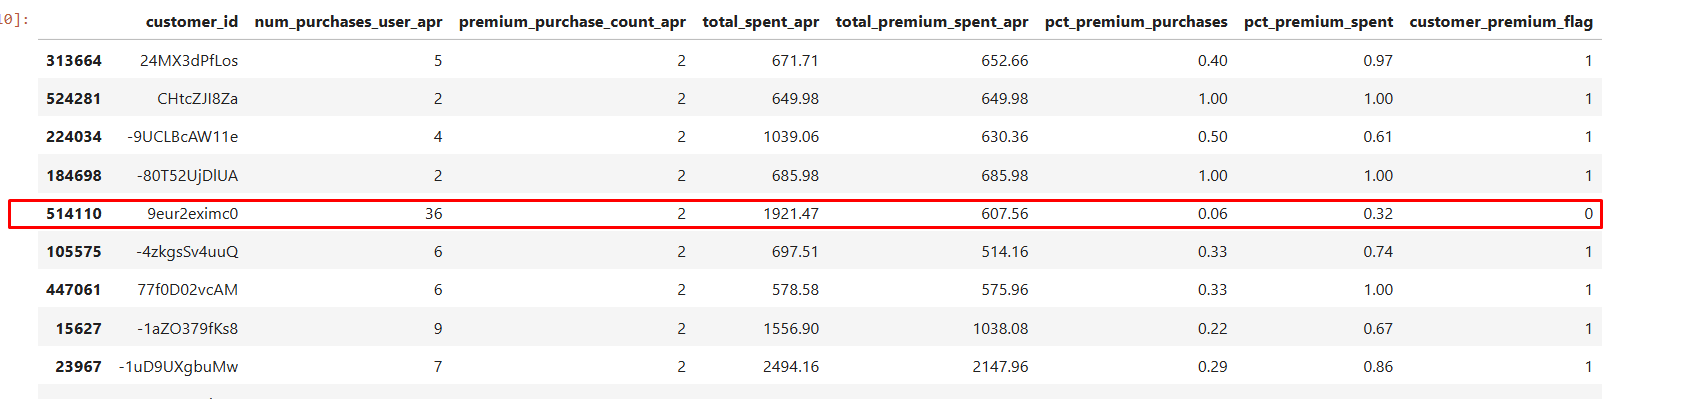

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.3 |   Validate results </h4>


In [127]:
df_user_premium_stats.sample(7)

,customer_id,num_diff_prod_per_user_apr,premium_purchase_count_apr,total_spent_apr,total_premium_spent_apr,pct_premium_purchases,pct_premium_spent,customer_premium_flag
255349,-aFroSfrxDFK,1,0,0.20,0.00,0.00,0.00,0
386903,4qXpti6J9e0,5,0,19.91,0.00,0.00,0.00,0
3410,-1823i6OCJ2w,70,0,3672.60,0.00,0.00,0.00,0
149395,-6fmBuNKGn6,1,0,139.96,0.00,0.00,0.00,0
338721,31YeCOG2fF6,1,0,0.35,0.00,0.00,0.00,0
467433,7tY7d6gdeSs,1,0,0.56,0.00,0.00,0.00,0
403099,5SdziB8dGbS,4,0,23.99,0.00,0.00,0.00,0


In [128]:
df_user_premium_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
num_diff_prod_per_user_apr,571338.00,2.31,5.30,1.00,1.00,1.00,3.00,1782.00
premium_purchase_count_apr,571338.00,0.05,0.35,0.00,0.00,0.00,0.00,42.00
total_spent_apr,571338.00,76.24,312.88,0.00,0.54,1.99,55.36,87220.66
total_premium_spent_apr,571338.00,21.96,181.44,0.00,0.00,0.00,0.00,26991.98
pct_premium_purchases,571338.00,0.02,0.12,0.00,0.00,0.00,0.00,1.00
pct_premium_spent,569014.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
customer_premium_flag,571338.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00


In [129]:
df_user_premium_stats["customer_premium_flag"].value_counts()

customer_premium_flag
0    554189
1     17149
Name: count, dtype: int64

In [130]:

df_test_test_premiums = df.merge(df_user_premium_stats[["customer_id","customer_premium_flag"]], 
              on=["customer_id"], how="left")

In [131]:
df_test_test_premiums["customer_premium_flag"].value_counts()

customer_premium_flag
0    1257585
1      60105
Name: count, dtype: int64

In [132]:
#antes sin aplicar nada
# item_premium
# 0    1291366
# 1      26324

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.3.3 | Merge Premium Product in df </h4>


In [133]:
# Merge item_premium

df = df.merge(df_item_premium[["category", "subcategory", "product_group", "product_name", "item_premium"]], 
              on=["category", "subcategory", "product_group", "product_name"], how="left")

In [134]:
df.sample(2)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium
26448,-a41FpEorsha,EK_2OTUQW6S,250,2022-04-02,Labels,Label & Stickers,Return Address Labels,NA Return Address Labels,US,34.17,106.96,07931-2237,US-Express,PAYPAL,0.00,68.05,Connecticut,CT,0.43,0.34,0
1229323,8JDRPPHpvQA,EK_G4IHE8OH,1000,2022-04-28,Marketing Materials,Advertising,Brochures / Folded Leaflets,NA Brochures,US,23.83,502.38,84084-5519,US-Standard,VISA,148.46,-55.59,Utah,UT,0.65,2.06,0


In [135]:
df.shape

(1317690, 21)

In [136]:
df["item_premium"].isnull().sum()

0

In [137]:
df["item_premium"].value_counts()

item_premium
0    1291527
1      26163
Name: count, dtype: int64

<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.5 |  Extract Discount Percentage for April </h3>


In [138]:
df_discount_percentage_april = df.copy()

In [139]:
df_discount_percentage_april.shape

(1317690, 21)

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.5.1 | Function to Calculate Discount Percentage  </h4>


In [140]:
#calculate the discount percentage

def calculate_discount_percentage_april(df):
    
   # total_bookings is not negative
    df.loc[df["total_bookings"] < 0, "total_bookings"] = 0
    
    # Calculate discount %
    df["discount_percentage"] = (df["discount"] / df["total_bookings"]) * 100
    
    # If discount is 0, discount_percentage is 0 too
    df.loc[df["discount"] == 0, "discount_percentage"] = 0
    
    # Limit discount values, 0% and 100%
    df.loc[df["discount_percentage"] < 0, "discount_percentage"] = 0
    df.loc[df["discount_percentage"] > 100, "discount_percentage"] = 100
    
    return df


In [141]:
# apply fuction calculate_discount_percentage_april

df_discount_percentage_april = calculate_discount_percentage_april(df_discount_percentage_april)

In [142]:
df_discount_percentage_april["discount_percentage"].describe()

count   1317690.00
mean         19.62
std          21.65
min           0.00
25%           0.00
50%          14.20
75%          29.56
max         100.00
Name: discount_percentage, dtype: float64

<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.6 | Creating a New Column: total bookings April </h3>


In [143]:
# 

df_total_bookings_april = df_discount_percentage_april.copy()

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.6.1 | Add Total Bookings per Customer</h4>


In [144]:
# # total_bookings_april

df_total_bookings_april["total_bookings_april"] = df_total_bookings_april.groupby("customer_id")["total_bookings"].transform("sum") 

In [145]:
# verify that it is really applied as we want

df_total_bookings_april[df_total_bookings_april["customer_id"] == "-4gT50X9RwqI" ][:2]  #1SJC60CEH39J4

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april
19157,-4gT50X9RwqI,EK_A7XTOTE3,1,2022-04-02,Signage,Poster,Posters,Posters - NA,US,4.95,6.70,70657-3023,US-Standard,MASTERCARD,3.56,0.14,Unknown,Unknown,10.26,42.15,0,53.13,15712.86
19183,-4gT50X9RwqI,EK_3ONIQQG7,1,2022-04-02,Signage,Poster,Posters,Posters - NA,US,4.95,6.70,80221-4650,US-Standard,MASTERCARD,3.56,0.14,Delaware,DE,10.26,42.15,0,53.13,15712.86


In [148]:
#
df = df_total_bookings_april.copy()

<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.6 | quantity april </h3>


In [149]:
#
df = df_total_bookings_april.copy()

In [150]:
df.sample(1)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april
972426,6rZQTHzxP2M,EK_G22MP1N0,50,2022-04-23,Marketing Materials,Advertising,Postcards,US Postcards (non-Mailable),US,10.31,121.96,34287-3912,US-Priority,VISA,32.00,106.15,Colorado,CO,3.08,0.89,0,26.24,121.96


In [151]:
# Total products bought in April for each customer_id

quantity_items_bought_april = df.groupby("customer_id")["quantity"].sum().reset_index()

In [152]:
# Rename column 

quantity_items_bought_april.rename(columns={"quantity": "total_qty_bought_apr"}, inplace=True)
quantity_items_bought_april[:2]

,customer_id,total_qty_bought_apr
0,-100360jDkIg,20
1,-100FrDWBBDy,100


In [153]:
df = df.merge(quantity_items_bought_april, on="customer_id", how="left")

In [154]:
quantity_items_bought_april["total_qty_bought_apr"].max()

420000

In [155]:
# test_prg = df[df["customer_id"] == "-4gT50X9RwqI" ]     #  discount_percentage =  max = 91.020  min = 30.95
# test_prg   #1391

<h2 style="color: #20C997  ; font-family: 'Trebuchet MS', sans-serif;"> 4.1 | User Dataset Analysis: 📈</h2>


<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.4 | Identifying Lifecycle Segment </h3>


In [156]:
df_users.sample(1)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered
308008,-8X8Fgb4x5Yc,2014-12-05,920.02,193.77,Periodic Buyer,1


In [157]:
df_users.shape

(603600, 6)

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.4.1 |Information about Segmens  </h4>


In [160]:
df_users["lifecycle_segment_name"].value_counts()

lifecycle_segment_name
Enthusiast Buyer      235991
Periodic Buyer        185094
One-Time Buyer 18M    124208
Reactivated Buyer      58231
At-Risk Buyer             32
Inactive                  23
Prospect                  13
At-Risk Prospect           3
One-Time Buyer 30D         3
Inactive Prospect          1
Name: count, dtype: int64

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.4.2 | Function to assing 1 or 0 || Lifecycle Segment  </h4>


In [161]:
# Assigns a value of 1 or 0 based on the buyer's lifecycle segment.
# Returns 1 if the buyer is classified as ---------------------------> "Enthusiast Buyer" or "Periodic Buyer", maybe ("One-Time Buyer 18M")
# Returns 0 for any other buyer segment.

def assign_count(data):
    if data in ["Enthusiast Buyer"]:
        return 1
    else:
        return 0

In [162]:
# Apply function

df_users["count_lifecycle"] = df_users["lifecycle_segment_name"].apply(assign_count)

In [163]:
df_users["count_lifecycle"].value_counts()

count_lifecycle
0    367609
1    235991
Name: count, dtype: int64

In [164]:
# 1    421085
#This result is normal, considering that the data comes from registered users on the platform.

<h4 style="color: #E75480 ; font-family: 'Trebuchet MS', sans-serif;"> Creae new column "shipping_category" in Users df </h4>

In [165]:
df["shipping_speed"].value_counts()

shipping_speed
US-Standard                                848074
US-Priority                                322288
US-Express                                 120757
US-Rush                                     14801
US-Standard AK-HI                            5663
US-Priority AK-HI                            3189
US-Standard Puerto Rico & International      2154
US-Express AK-HI                              394
US-Priority Puerto Rico & International       268
Standard                                       80
Economy                                        12
Express                                        10
Name: count, dtype: int64

In [166]:
def categorize_shipping(speed):
    if "Standard" in speed or "Economy" in speed:
        return "Standard"
    elif "Priority" in speed:
        return "Priority"
    elif "Express" in speed or "Rush" in speed:
        return "Express/Rush"
    else:
        return "Other"


In [167]:
#apply function

df["shipping_category"] = df["shipping_speed"].apply(categorize_shipping)

In [168]:
df["shipping_category"].value_counts()

shipping_category
Standard        855983
Priority        325745
Express/Rush    135962
Name: count, dtype: int64

In [169]:
df["shipping_category"].value_counts()

shipping_category
Standard        855983
Priority        325745
Express/Rush    135962
Name: count, dtype: int64

In [170]:
# shipping_speed   count  
# Standard        855891  # Todas las variantes de Standard  
# Priority        325745  # Todas las variantes de Priority  
# Express/Rush   135952  # Todas las variantes de Express y Rush  


<h4 style="color: #E75480 ; font-family: 'Trebuchet MS', sans-serif;"> State Transformation in Region! </h4>

In [171]:
df["order_created_date"].max()

'2022-04-30'

In [172]:
df3.shape

(603600, 6)

In [173]:
df.sample(1)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april,total_qty_bought_apr,shipping_category
669794,HUfLcEKp5m,EK_YW00CCD4,250,2022-04-16,Consumer,Other Celebrations,Bookmarks,NA Bookmarks,US,13.56,173.54,88254-0001,US-Priority,VISA,39.60,150.08,Mississippi,MS,0.85,1.79,0,22.82,572.32,890,Priority


In [175]:
df[df["state"] == "Invalid"][:1]

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april,total_qty_bought_apr,shipping_category
101,1IoZeE3JOTu,EK_OW8HNH13,1,2022-04-01,Business Cards,Accessories,Business Card Accessories,NA Black Leather Vertical Business Card Holders,US,3.99,27.70,J5M 2B6,US-Priority,MASTERCARD,5.56,17.04,Invalid,Invalid,33.26,33.75,0,20.07,199.48,104,Priority


In [176]:
#replace Invalid --> Unknow, only 4600 invalid.

df["state"] = df["state"].replace("Invalid", "Unknown")
df["state_abbreviation"] = df["state_abbreviation"].replace("Invalid", "Unknown")

In [177]:
#Regions valids

regions = {
    "Northeast": ["Massachusetts", "Vermont", "New Hampshire", "Connecticut", "Pennsylvania", "Delaware", "New Jersey", "Maine", "Maryland"],
    "Midwest": ["North Dakota", "Michigan", "Wisconsin", "Kansas", "Illinois", "Minnesota"],
    "South": ["Louisiana", "Virginia", "West Virginia", "Kentucky", "Florida", "Alabama", "South Carolina", "Oklahoma", "Georgia", "North Carolina", "Texas", "Mississippi", "Arkansas"],
    "West": ["Colorado", "California", "Hawaii", "Utah", "Nevada", "Alaska", "Arizona", "Washington"],
    "Territories": ["Northern Mariana Islands", "Virgin Islands", "District of Columbia", "Puerto Rico"],
    "Unknown": ["Unknown"]  
}

# Function to assign regions

def categorize_state(state):
    for region, states in regions.items():
        if state in states:
            return region
    return "Unknown"   


In [178]:
# Apply function categorization

df["region"] = df["state"].apply(categorize_state)

In [179]:
df["region"].value_counts()

region
South          459502
Unknown        288478
West           230754
Northeast      164397
Midwest        121234
Territories     53325
Name: count, dtype: int64

<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.6 | Adding New Features to the User Dataset "df_users" </h3>


In [180]:
# 
df_users.sample(1)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle
230732,-ZFFtwc2q6Q,2010-10-17,122.98,0.00,Enthusiast Buyer,1,1


<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Merge discount percentage April</h4>


In [181]:
df_users.sample(1)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle
247390,3nTaH4TElhu,2009-08-24,857.85,905.96,Periodic Buyer,1,0


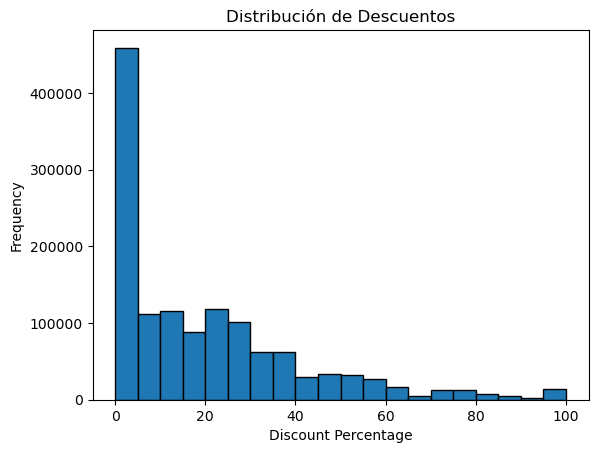

In [182]:
plt.hist(df["discount_percentage"], bins=20, edgecolor="black")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Distribución de Descuentos")
plt.show()


In [183]:
merge_discount_percentage_april = df.groupby("customer_id", as_index=False)["discount_percentage"].mean()

In [184]:
df_users = df_users.merge(merge_discount_percentage_april, on="customer_id", how="left")

In [185]:
df_users.shape

(603600, 8)

<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Merge total items bought in April</h4>


In [186]:
merge_quantity_items_bought_april = df.groupby("customer_id", as_index=False)["total_qty_bought_apr"].max()

In [187]:
df_users = df_users.merge(merge_quantity_items_bought_april, on="customer_id", how="left")

In [188]:
test_merge_prg = df_users[df_users["customer_id"] == "-4gT50X9RwqI" ]     #  discount_percentage =  max = 91.020  min = 30.95
test_merge_prg

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr
491490,-4gT50X9RwqI,2022-03-27,NaN,NaN,Enthusiast Buyer,1,1,54.68,1391.00


<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Merge Max Bookings per Customer  </h4>


In [189]:
merge_max_bookings_df_users = df.groupby("customer_id", as_index=False)["total_bookings_april"].max()

In [190]:
merge_max_bookings_df_users[:2]

,customer_id,total_bookings_april
0,-100360jDkIg,307.96
1,-100FrDWBBDy,211.94


In [191]:
df_users = df_users.merge(merge_max_bookings_df_users, on="customer_id", how="left")

In [192]:
# df[df["customer_id"] == "-4gT50X9RwqI" ]    
df_users[df_users["customer_id"] == "-4gT50X9RwqI" ]  

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april
491490,-4gT50X9RwqI,2022-03-27,NaN,NaN,Enthusiast Buyer,1,1,54.68,1391.00,15712.86


In [193]:
df_users["customer_id"].duplicated().sum()

0

<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Merge Shipping Cost Budget USD in Users Dataset</h4>


In [194]:
merge_shipping_cost_budget_usd_df_users = df.groupby("customer_id", as_index=False)["shipping_cost_budget_usd"].mean()

In [195]:
merge_shipping_cost_budget_usd_df_users[:2]

,customer_id,shipping_cost_budget_usd
0,-100360jDkIg,13.01
1,-100FrDWBBDy,10.23


In [196]:
#merge

df_users = df_users.merge(merge_shipping_cost_budget_usd_df_users, on="customer_id", how="left")

In [197]:
# Rename colum

df_users.rename(columns={"shipping_cost_budget_usd": "avg_ship_cost_apr"}, inplace=True)

<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Identifying Premium Customers & Merge data in User Dataset </h4>

In [202]:
df.sample(1)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april,total_qty_bought_apr,shipping_category,region
1234567,-89qQjbzcV3O,EK_HC1M46GG,100,2022-04-28,Business Cards,Business Cards,Business Cards - Standard,NA Business Cards - Business Cards - Standard,US,8.72,63.96,01906-2819,US-Priority,VISA,0.00,52.51,Maryland,MD,0.64,0.34,0,0.00,63.96,100,Priority,Northeast


In [203]:

df = df.merge(df_user_premium_stats[["customer_id","customer_premium_flag"]],  on=["customer_id"], how="left")

In [204]:
df.shape

(1317690, 27)

In [205]:
df["customer_premium_flag"].value_counts()

customer_premium_flag
0    1257585
1      60105
Name: count, dtype: int64

In [207]:
# use groupby to deduplicate and get the highest premium_buyer status per customer_id.

df_merge_premium_buyer = df.groupby("customer_id", as_index=False)["customer_premium_flag"].max() 

In [208]:
# merge premium_buyer in df_users

df_users = df_users.merge(df_merge_premium_buyer[["customer_id", "customer_premium_flag"]], on="customer_id", how="left")  #interesting user -4gT50X9RwqI	

In [209]:
# Verification if it Works
df_users[df_users["customer_id"] == "-7iE5XIfNJK0" ]  # -4gT50X9RwqI   

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,customer_premium_flag
288658,-7iE5XIfNJK0,NaN,NaN,NaN,One-Time Buyer 18M,0,0,2.09,20.00,4785.18,40.01,1.00


In [210]:
df_users["customer_premium_flag"].value_counts()

customer_premium_flag
0.00    553780
1.00     17138
Name: count, dtype: int64

<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;">   Merge new column "region" in Users Dataset </h4>

In [213]:
# customer_id	region

df_merge_region = df.groupby("customer_id", as_index=False)["region"].first() 

In [214]:
df_merge_region[:2]

,customer_id,region
0,-100360jDkIg,Midwest
1,-100FrDWBBDy,South


In [215]:
# merge region

df_users = df_users.merge(df_merge_region[["customer_id", "region"]], on="customer_id", how="left")  

In [216]:
df_users.shape

(603600, 13)

In [217]:
df_users.sample(1)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,customer_premium_flag,region
216430,2hfjU6tqFaM,2009-04-17,NaN,NaN,Enthusiast Buyer,1,1,6.94,40.00,56.16,6.08,0.00,Territories


<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> Merge "Shipping Categoy" in Users Data  </h4>

In [218]:
df["shipping_category"].value_counts()

shipping_category
Standard        855983
Priority        325745
Express/Rush    135962
Name: count, dtype: int64

In [219]:
# Grou`by customers + Shipping Category

df_merge_shipping_category = df.groupby("customer_id", as_index=False)["shipping_category"].first() 

In [220]:
df_merge_shipping_category[:2]

,customer_id,shipping_category
0,-100360jDkIg,Priority
1,-100FrDWBBDy,Standard


In [221]:
# merge shipping_category

df_users = df_users.merge(df_merge_shipping_category[["customer_id", "shipping_category"]], on="customer_id", how="left")  

<h3 style="color: #7f8c8d; font-family: 'Trebuchet MS', sans-serif;">3.1.6 | K means </h3>


In [405]:
df_scaled = df_users.copy()

In [406]:
df.sample(1)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april,total_qty_bought_apr,shipping_category,region,customer_premium_flag
297520,-9OypHWHYqME,EK_U03XECKX,1,2022-04-08,Signage,Decals,Window Decals,Window Decals - NA,US,10.05,60.14,07302-5873,US-Standard,VISA,12.04,39.95,Connecticut,CT,72.18,71.02,0,20.02,500.80,181,Standard,Northeast,0


In [407]:
df_users.sample(1)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,customer_premium_flag,region,shipping_category
303224,-9Nr7mEpWMuY,2022-06-18,NaN,NaN,One-Time Buyer 18M,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
df_users["region"].value_counts()

region
South          199676
Unknown        125626
West           100598
Northeast       69124
Midwest         52904
Territories     22990
Name: count, dtype: int64

In [409]:
df_users["shipping_category"].value_counts()

shipping_category
Standard        368566
Priority        151093
Express/Rush     51259
Name: count, dtype: int64

In [410]:
df_scaled.shape

(603600, 14)

<h4 style="color: #E75480; font-family: 'Trebuchet MS', sans-serif;"> 3.1.5.1 |Scale  </h4>


In [411]:
df_scaled["total_variable_gross_profit_6mo"] = df_scaled["total_variable_gross_profit_6mo"].fillna(0)
df_scaled["total_variable_gross_profit_3yr"] = df_scaled["total_variable_gross_profit_3yr"].fillna(0)
df_scaled["total_bookings_april"] = df_scaled["total_bookings_april"].fillna(0)



In [412]:
df_scaled["total_bookings_april"].isnull().sum()

0

In [413]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603600 entries, 0 to 603599
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      603600 non-null  object 
 1   registration_date                555622 non-null  object 
 2   total_variable_gross_profit_3yr  603600 non-null  float64
 3   total_variable_gross_profit_6mo  603600 non-null  float64
 4   lifecycle_segment_name           603599 non-null  object 
 5   registered                       603600 non-null  int64  
 6   count_lifecycle                  603600 non-null  int64  
 7   discount_percentage              570918 non-null  float64
 8   total_qty_bought_apr             570918 non-null  float64
 9   total_bookings_april             603600 non-null  float64
 10  avg_ship_cost_apr                570918 non-null  float64
 11  customer_premium_flag            570918 non-null  float64
 12  re

In [414]:
#important

df_scaled = df_scaled.dropna()


In [419]:
from sklearn.preprocessing import StandardScaler

# Normalization
columns_to_scale = ["total_variable_gross_profit_3yr", "total_variable_gross_profit_6mo","discount_percentage","total_qty_bought_apr","total_bookings_april","avg_ship_cost_apr"]
columns_not_scaled = ["registered","count_lifecycle","customer_premium_flag"]   



# Apply normalization
scaler = StandardScaler()
 
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [421]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
total_variable_gross_profit_3yr,522940.00,0.00,1.00,-89.68,-0.24,-0.24,-0.09,192.00
total_variable_gross_profit_6mo,522940.00,-0.00,1.00,-64.54,-0.23,-0.23,-0.13,129.35
registered,522940.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
count_lifecycle,522940.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00
discount_percentage,522940.00,-0.00,1.00,-0.91,-0.91,-0.20,0.52,4.67
total_qty_bought_apr,522940.00,-0.00,1.00,-0.30,-0.26,-0.19,-0.05,209.17
total_bookings_april,522940.00,0.00,1.00,-0.47,-0.34,-0.24,-0.02,140.51
avg_ship_cost_apr,522940.00,0.00,1.00,-0.70,-0.30,-0.15,0.06,114.63
customer_premium_flag,522940.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00


<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> 3.2.7.2 | kmeans </h4>


In [423]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

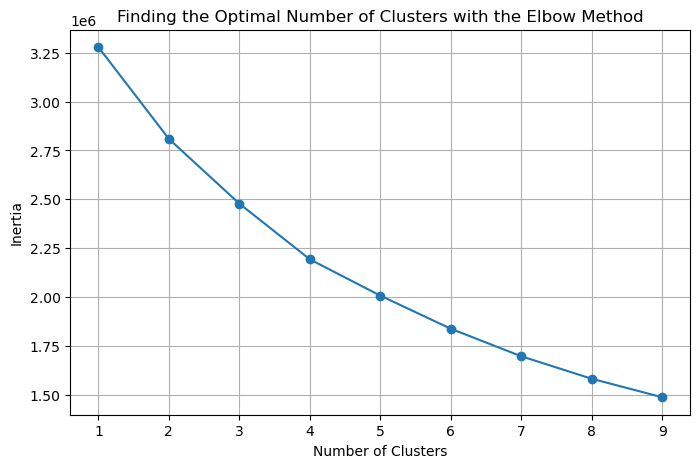

In [424]:
# Elbow Method to determine the optimal number of clusters
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[columns_to_scale + columns_not_scaled])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Finding the Optimal Number of Clusters with the Elbow Method")
plt.grid()
plt.show()


<h4 style="color: #227EE6 ; font-family: 'Trebuchet MS', sans-serif;"> 3.3.7.1 | a </h4>


In [425]:
from sklearn.cluster import KMeans

# Definir el modelo con k=3 o 2 en mi caso
# Entrenar el modelo KMeans con k=3
 
kmeans = KMeans(n_clusters= 4, random_state=42, n_init=10)
df_scaled.loc[:, "cluster"] = kmeans.fit_predict(df_scaled[columns_to_scale + columns_not_scaled])  # ✅ USAR df_scaled


In [426]:
# Ver distribución de los clusters
print(df_scaled["cluster"].value_counts())

# cluster            with out "discount_percentage", "quantity_items_bought_april"
# 0    495739
# 1     19197
# 2      7300
# 3       704

cluster
3    351478
1    159844
2      7265
0      4353
Name: count, dtype: int64


In [427]:
df_users["customer_premium_flag"].value_counts()

customer_premium_flag
0.00    553780
1.00     17138
Name: count, dtype: int64

In [428]:
df_scaled.sample(4)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,customer_premium_flag,region,shipping_category,cluster
335002,-5PwjFRZwzew,2022-06-20,-0.24,-0.23,One-Time Buyer 18M,1,0,-0.91,-0.27,-0.06,0.09,0.00,Northeast,Priority,3
405003,-D7WJQipuNi,2009-03-17,-0.17,-0.15,Enthusiast Buyer,1,1,-0.91,-0.25,-0.36,0.07,0.00,Northeast,Express/Rush,3
134961,2waGvY32IwM,2022-04-24,-0.24,-0.23,Periodic Buyer,1,0,3.64,-0.30,-0.44,-0.12,0.00,Northeast,Standard,1
181736,3NFsrsiPcBi,2013-12-26,-0.22,-0.17,Periodic Buyer,1,0,-0.35,-0.30,-0.02,0.07,1.00,Northeast,Standard,3


In [429]:
# Calcular la media de las columnas numéricas agrupadas por cluster
numerical_cols = columns_to_scale + columns_not_scaled
modelo_mean = df_scaled.groupby("cluster")[numerical_cols].median()
modelo_mean

,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,registered,count_lifecycle,customer_premium_flag
cluster,,,,,,,,,
0,-0.22,-0.23,-0.12,2.95,3.88,2.88,1.00,1.00,0.00
1,-0.24,-0.23,0.89,-0.17,-0.14,-0.16,1.00,0.00,0.00
2,3.51,4.20,-0.10,0.08,0.31,-0.08,1.00,1.00,0.00
3,-0.24,-0.23,-0.91,-0.22,-0.28,-0.15,1.00,0.00,0.00


In [430]:
df_scaled.sample(1)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,customer_premium_flag,region,shipping_category,cluster
124414,8Ik4taZpf32,2011-08-25,1.07,-0.23,Enthusiast Buyer,1,1,-0.91,-0.28,-0.37,-0.40,0.00,West,Standard,3


In [431]:
# Calcular el mean de las columnas numéricas agrupadas por cluster
numerical_cols = columns_to_scale + columns_not_scaled
modelo_mean = df_scaled.groupby("cluster")[numerical_cols].mean()
modelo_mean

,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,registered,count_lifecycle,customer_premium_flag
cluster,,,,,,,,,
0,0.57,0.22,0.21,4.89,5.65,5.20,1.00,0.74,0.11
1,-0.05,-0.07,1.18,0.05,0.05,-0.03,1.00,0.40,0.04
2,4.77,5.28,0.21,0.58,0.97,0.13,1.00,0.93,0.08
3,-0.08,-0.08,-0.54,-0.09,-0.11,-0.05,1.00,0.37,0.02


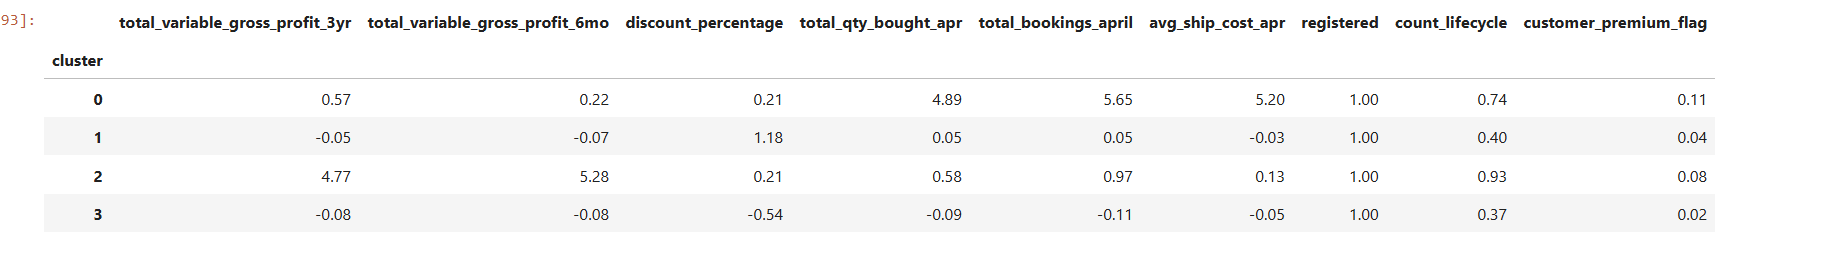

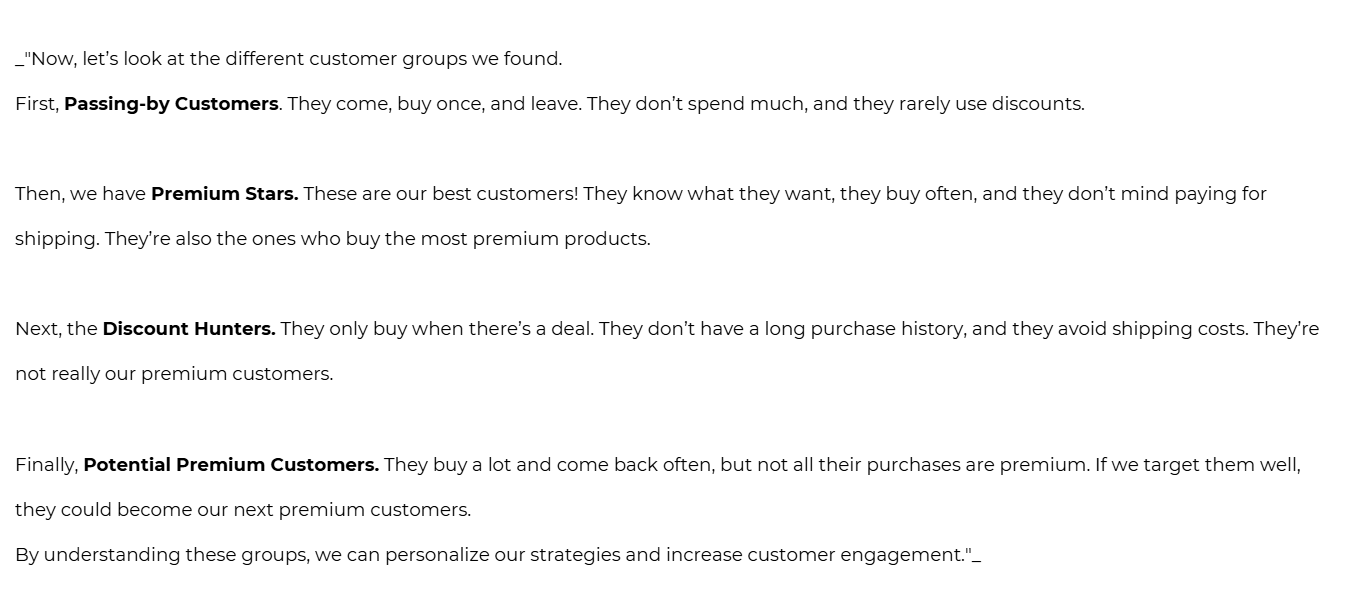

In [400]:
#  PCA 
pca = PCA(n_components=2)
modelo_pca = pca.fit_transform(df_scaled[numerical_cols])

In [401]:
# Agregar componentes principales al DataFrame
df_scaled["PCA1"] = modelo_pca[:, 0]
df_scaled["PCA2"] = modelo_pca[:, 1]

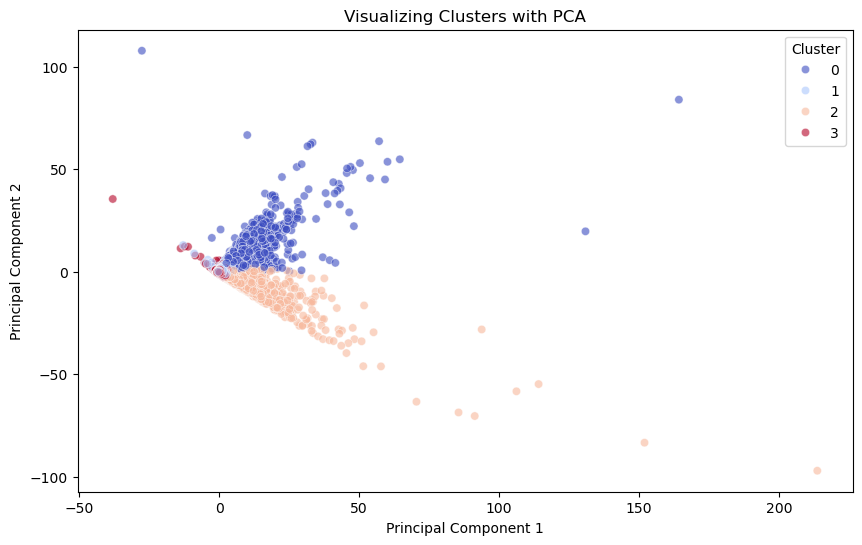

In [402]:
# Visualizing clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x="PCA1", y="PCA2", hue="cluster", palette="coolwarm", alpha=0.6)
plt.title("Visualizing Clusters with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


<h3 style="color: #7RFS8D; font-family: 'Trebuchet MS', sans-serif;">3.2.7 | Business Impact Simulation </h3>

In [510]:
df_scaled.sample(2)

,customer_id,registration_date,total_variable_gross_profit_3yr,total_variable_gross_profit_6mo,lifecycle_segment_name,registered,count_lifecycle,discount_percentage,total_qty_bought_apr,total_bookings_april,avg_ship_cost_apr,customer_premium_flag,region,shipping_category,cluster
185231,a1GV15tpsyI,2007-01-24,-0.23,-0.23,Periodic Buyer,1,0,0.17,-0.28,-0.39,-0.11,0.00,Unknown,Standard,3
42609,-7ZNGL10AscE,2020-07-07,-0.17,-0.23,Periodic Buyer,1,0,-0.91,-0.17,-0.36,-0.17,0.00,West,Standard,3


In [268]:
# Merge item_premium

df = df.merge(df_scaled[["customer_id","cluster"]], on=["customer_id"], how="left")

In [511]:
df.sample(2)

,customer_id,order_number,quantity,order_created_date,category,subcategory,product_group,product_name,country,shipping_cost_budget_usd,total_bookings,order_shipping_address_postal_code,shipping_speed,payment_method_name,discount,variable_gross_profit,state,state_abbreviation,price,mean_price,item_premium,discount_percentage,total_bookings_april,total_qty_bought_apr,shipping_category,region,customer_premium_flag,cluster
294627,-1oiUJ9bJUE8,EK_KYAM3G2H,1,2022-04-08,Promotique Clothing & Bags,Clothing,Outerwear,Sport-Tek ® Ladies PosiCharge ® Tri-Blend Wick...,US,10.18,88.22,80211-2949,US-Standard,VISA,0.00,44.86,Delaware,DE,88.22,74.39,0,0.00,88.22,1,Standard,Northeast,0,3.00
869969,-3nBQUMWoqMo,EK_ODA29U5G,8,2022-04-19,Promotique Clothing & Bags,Clothing,Polos,Elevate Women's Kiso Short Sleeve Polo Shirt,US,4.36,327.74,53051,US-Standard,VISA,50.64,129.78,Unknown,Unknown,47.30,56.89,0,15.45,948.40,24,Standard,Unknown,0,3.00


In [270]:
df["total_bookings"].sum() # 172 M dollars

171889461.45076

In [436]:
# Merge item_premium

df = df.merge(df_scaled[["customer_id","cluster"]], on=["customer_id"], how="left")

In [494]:
total_bookings_post_actualizacion  = df.copy()

In [495]:
total_bookings_post_actualizacion["total_bookings"].sum()

171889461.45076

In [496]:
total_bookings_post_actualizacion.loc[total_bookings_post_actualizacion['cluster'].isin([0, 2]), 'total_bookings'] *= 2  #221047163.151952
total_bookings_post_actualizacion["total_bookings"].sum()

196468312.30135605

In [497]:
a = 221047163.151952 - 171889461.45076
a

49157701.70119199

In [440]:
df["category"].value_counts()

category
Business Cards                475356
Signage                       235012
Marketing Materials           132182
Consumer                      129032
Promotique Clothing & Bags     99073
Labels                         80165
Stationery                     65046
Promotique Hard Goods          37722
PPAG Clothing & Bags           37573
Packaging                      11580
PPAG Hard Goods                 8946
Samples                         4121
Digital                         1411
Design Services                  464
Unmapped                           7
Name: count, dtype: int64

In [512]:
total_bookings_post_actualizacion["total_bookings"].sum()

196468312.30135605